**LDA(Latent Dirichlet Allocation)**: A probability-based topic modeling technique that finds hidden (latent) topics in a set of documents.

In [1]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

**gensim**: A library specifically designed for unsupervised topic modeling and document similarity.
- corpora: Used to build a Dictionary (mapping words to IDs) and a Corpus (Bag-of-Words representation).
- models: Contains the implementations of topic modeling algorithms, including LDA.

In [2]:
# Initializing Preprocessing Tools
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [3]:
# Example Data
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

**Document**: In LDA, a "document" is the basic unit of analysis. Here, one sentence = one document. In real-world scenarios, a document might be a news article, an email, or a research paper.

In [4]:
# Creating the Corpus
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i, doc_j]

**Corpus**: In Natural Language Processing (NLP), a "Corpus" (plural: Corpora) refers to the complete collection of text documents used for analysis.

In [5]:
doc_set

['Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother.',
 'My mother spends a lot of time driving my brother around to baseball practice.',
 'Some health experts suggest that driving may cause increased tension and blood pressure.',
 'I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better.',
 'Health professionals say that brocolli is good for your health.',
 'Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with.',
 'Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate',
 'Big data was originally associated with three key concepts: volume, variety, and velocity.',
 "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and 

In [6]:
# Text Preprocessing Loop

texts = [] # an empty list

for w in doc_set:
    raw = w.lower() # Convert all text to lowercase
    tokens = tokenizer.tokenize(raw) # tokenizer
    stopped_tokens = [i for i in tokens if not i in stop_words] # Filter out Stopwords
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens] # Porter Stemmer ('driving' -> 'drive')
    texts.append(stemmed_tokens)

In [7]:
texts # Lists of strings (tokens).

[['brocolli',
  'good',
  'eat',
  'brother',
  'like',
  'eat',
  'good',
  'brocolli',
  'mother'],
 ['mother',
  'spend',
  'lot',
  'time',
  'drive',
  'brother',
  'around',
  'basebal',
  'practic'],
 ['health',
  'expert',
  'suggest',
  'drive',
  'may',
  'caus',
  'increas',
  'tension',
  'blood',
  'pressur'],
 ['often',
  'feel',
  'pressur',
  'perform',
  'well',
  'school',
  'mother',
  'never',
  'seem',
  'drive',
  'brother',
  'better'],
 ['health', 'profession', 'say', 'brocolli', 'good', 'health'],
 ['big',
  'data',
  'term',
  'use',
  'refer',
  'data',
  'set',
  'larg',
  'complex',
  'tradit',
  'data',
  'process',
  'applic',
  'softwar',
  'adequ',
  'deal'],
 ['data',
  'mani',
  'case',
  'offer',
  'greater',
  'statist',
  'power',
  'data',
  'higher',
  'complex',
  'may',
  'lead',
  'higher',
  'fals',
  'discoveri',
  'rate'],
 ['big',
  'data',
  'origin',
  'associ',
  'three',
  'key',
  'concept',
  'volum',
  'varieti',
  'veloc'],
 ['2016

In [8]:
# Dictionary Construction and Numerical Conversion
dictionary = corpora.Dictionary(texts)

**corpora.Dictionary(texts)**:
- This function scans through all the documents in our processed texts list.
- It assigns a unique integer ID to every unique word found in the entire corpus.
- For example: 'brocolli' $\rightarrow$ 0, 'data' $\rightarrow$ 1, 'computer' $\rightarrow$ 2.

By converting words to unique IDs, we can represent a document as a vector of numbers (e.g., "Word ID 5 appears 3 times"), which allows the computer to calculate statistical relationships.

In [9]:
# Bag-of-Words (BoW) Conversion
corpus = [dictionary.doc2bow(text) for text in texts]

**doc2bow**: Converts words in a document into a list of tuples in the form "(Word ID, Frequency)")

In [10]:
corpus

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (5, 1),
  (8, 1),
  (19, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (3, 1), (16, 2), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(18, 1),
  (35, 1),
  (36, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(34, 1),
  (36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(34, 1),
  (36, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),

- Each inner list represents one Document.
- Tuples (ID, Count)

# Training the LDA Model

In [11]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary)

- corpus: Bag-of-Words input data.
- num_topics=3: Hyperparameter specifying that the model should find 3 topics 
- id2word=dictionary: Maps word IDs back to readable words for interpreting results.

In [12]:
# Inspecting LDA Topics
ldamodel.print_topics(num_words=5)

[(0,
  '0.055*"data" + 0.037*"health" + 0.028*"higher" + 0.025*"may" + 0.021*"complex"'),
 (1,
  '0.057*"data" + 0.036*"big" + 0.024*"varieti" + 0.024*"veloc" + 0.024*"key"'),
 (2,
  '0.048*"brother" + 0.048*"mother" + 0.036*"brocolli" + 0.036*"good" + 0.036*"eat"')]

**Output format**: (Topic ID, 'Weight"Word" + Weight*"Word" ...'). 
- Topic ID (0, 1, 2) is the unique ID for the 3 distinct themes.
- Word is the keyword.
- Weight is the probability value indicating importance; higher means more representative.

In [12]:
# Predicting Topics for a Specific Document
ldamodel.get_document_topics(corpus)[7] 

[(0, 0.9373829), (1, 0.030705275), (2, 0.0319119)]

- 7th document: Big data was originally associated with three key concepts: volume, variety, and velocity.
- Example: (2, 0.935...) means 93% probability of being Topic 2)

# The Challenge of Choosing K

In LDA, the number of topics K is a hyperparameter we must define. 
- If K is too small, distinct topics are forced together.
- If K is too large, similar topics are unnecessarily split.

Therefore, finding the 'appropriate number of topics' that best explains the data while remaining interpretable is essential.

### Perplexity

- Meaning: How "surprised" is the model when it sees a new document? 
- Interpretation: Lower is better.
- Limitation: If you blindly increase the number of topics, Perplexity keeps dropping, but the human interpretability of topics often gets worse.

In [14]:
# Calculating Perplexity
print('Perplexity: ', ldamodel.log_perplexity(corpus))

Perplexity:  -5.0035564837784605


### Coherence Model

While Perplexity measures statistical fit, Coherence measures semantic quality.
It examines the top words in a topic (e.g., "mother", "father", "sister") and checks if they actually appear together in the original text.

- High Coherence: Top words frequently co-occur, suggesting the topic is semantically consistent.
- Low Coherence: Top words rarely appear together, suggesting the topic is a random mix of noise.

In [15]:
from gensim.models import CoherenceModel

In [16]:
# Calculating Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.564100788885926


Interpretation: A score closer to 1.0 generally indicates highly coherent topics (words fit perfectly together), while scores closer to 0 indicate random noise.

- **model=ldamodel**: The trained LDA model to evaluate.
- **texts=texts**: Uses original word tokens (not BoW) so the algorithm can compute word co-occurrence.
- **dictionary=dictionary**: Converts internal word IDs back to readable terms.
- **topn=10**: Evaluates topic coherence using the top 10 words per topic.


### Calculating Perplexity for Different K Values
To find the optimal number of topics (K), we increase the number of topics from 2 to 9, calculating and recording the Perplexity for each.

In [17]:
perplexity_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

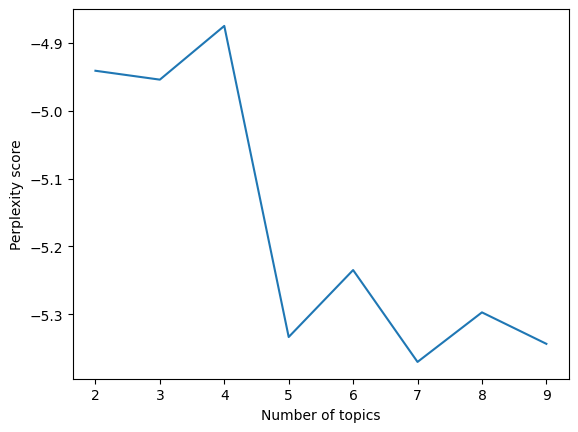

In [18]:
import matplotlib.pyplot as plt

x = range(2, 10)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

As the number of topics increases, the model fits the data more closely, so Perplexity usually keeps decreasing (downward trend).

- Because it keeps dropping, Perplexity alone is often insufficient to find the "optimal" $K$. We usually look for an "elbow" where the improvement slows down, or we rely on the Coherence Score (next step) for a better signal.

### Calculating & Visualizing Coherence Scores

In [19]:
coherence_values = []

for i in range(2,10):
    
    # Train model for K topics
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    
    # Calculate coherence
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

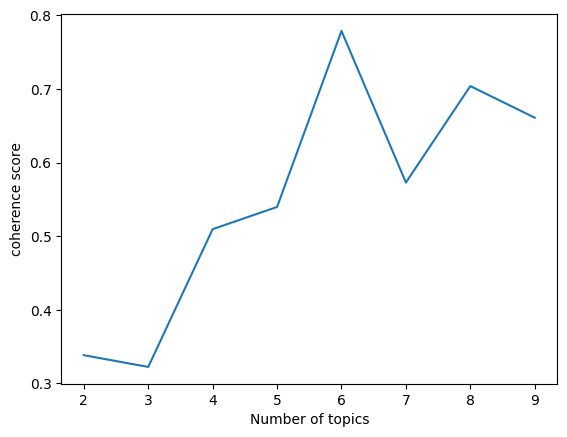

In [20]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("coherence score")
plt.show()

- Unlike Perplexity (where lower is better), we want a higher Coherence Score. A peak indicates that the topics are most semantically distinct and understandable to humans at that specific $K$.

# Selecting Optimal K and Retraining

- The number of topics with the highest score, or
- The point where the score rises sharply and then plateaus ("elbow").

In [21]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary)
ldamodel.print_topics(num_words=7)

[(0,
  '0.029*"feel" + 0.027*"mother" + 0.027*"better" + 0.027*"drive" + 0.027*"perform" + 0.026*"pressur" + 0.026*"often"'),
 (1,
  '0.086*"data" + 0.045*"process" + 0.024*"big" + 0.024*"drive" + 0.024*"use" + 0.024*"health" + 0.024*"tradit"'),
 (2,
  '0.083*"good" + 0.083*"brocolli" + 0.057*"brother" + 0.057*"mother" + 0.057*"eat" + 0.057*"health" + 0.031*"like"'),
 (3,
  '0.012*"health" + 0.012*"data" + 0.012*"brocolli" + 0.012*"drive" + 0.012*"good" + 0.012*"brother" + 0.012*"mother"'),
 (4,
  '0.077*"data" + 0.050*"higher" + 0.032*"big" + 0.032*"veloc" + 0.032*"concept" + 0.032*"three" + 0.032*"associ"'),
 (5,
  '0.029*"asset" + 0.029*"valu" + 0.029*"repres" + 0.028*"inform" + 0.028*"data" + 0.028*"transform" + 0.028*"method"')]

In [22]:
# Visualizing Document Topics with Pandas
import pandas as pd
pd.DataFrame(ldamodel.get_document_topics(corpus)[0])

,0,1
0,0,0.016677
1,1,0.016667
2,2,0.916649
3,3,0.016667
4,4,0.016667
5,5,0.016673


- Column 0: Topic ID;
- Column 1: Probability (Weight) that the document belongs to that topic

In [23]:
# Check topic distribution for the 2nd document (Index 1)
ldamodel.get_document_topics(corpus)[1]

[(0, 0.016692296),
 (1, 0.01668342),
 (2, 0.91660976),
 (3, 0.016667869),
 (4, 0.016667178),
 (5, 0.016679496)]

In [24]:
# Print the actual text of the 2nd document
doc_set[1]

'My mother spends a lot of time driving my brother around to baseball practice.'

In [25]:
# Check topic distribution for the 9th document (Index 8)
ldamodel.get_document_topics(corpus)[8]

[(5, 0.96023214)]

In [26]:
# Print the actual text of the 9th document
doc_set[8]

"A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."

**Dominant Topic**: In most practical applications (like tagging articles), we don't say "This article is 90% Sports and 10% Politics." We simply assign the label with the highest probability (the Dominant Topic).

**Human Verification**: Metrics like Perplexity and Coherence are useful, but the ultimate test of a Topic Model is whether a human agrees with the labels it assigns to known documents.

### Extracting the Dominant Topic for All Documents

Classification for the entire dataset

In [27]:
# Calculate topic distribution for the entire corpus
doc_topic_dist = ldamodel[corpus]

In [28]:
# Extract the Dominant Topic (Topic with highest probability) for each document
document_topic = [max(doc, key=lambda x: x[1])[0] for doc in doc_topic_dist]
document_topic

[2, 2, 1, 0, 2, 1, 4, 4, 5, 1]

### Creating a Topic Distribution Matrix

In [29]:
# Check detailed probabilities for the 4th document (Index 3)
pd.DataFrame(ldamodel.get_document_topics(corpus)[3])

,0,1
0,0,0.935654
1,1,0.012851
2,2,0.012944
3,3,0.012822
4,4,0.012821
5,5,0.012908


In [30]:
# Create a combined DataFrame for all documents

# Initialize with the 1st document
df = pd.DataFrame(ldamodel.get_document_topics(corpus)[0])

# Loop to add columns for the remaining documents
for i in range(0, 10):
    df[i] = pd.DataFrame(ldamodel.get_document_topics(corpus)[i])[1]

df

,0,1,2,3,4,5,6,7,8,9
0,0.016677,0.016692,0.015182,0.935656,0.023810,0.95093,0.950922,0.015160,0.960236,0.018524
1,0.016667,0.016683,0.924106,0.012851,0.023841,NaN,NaN,0.015185,NaN,0.907340
2,0.916649,0.916611,0.015226,0.012940,0.880919,NaN,NaN,0.015152,NaN,0.018519
3,0.016667,0.016668,0.015153,0.012822,0.023811,NaN,NaN,0.015153,NaN,0.018520
4,0.016667,0.016667,0.015167,0.012821,0.023810,NaN,NaN,0.924140,NaN,0.018541
5,0.016673,0.016679,0.015166,0.012909,0.023810,NaN,NaN,0.015211,NaN,0.018555


- Rows (0-5): Represent the 6 Topics.
- Columns (0-9): Represent the 10 Documents.
- Values: The probability that a specific document belongs to a specific topic.

In [31]:
# Sum probability verification: 
# Does the sum of the topic probabilities of each document really add up to 1 (100%)?

df.sum()

0    1.000000
1    1.000000
2    1.000000
3    1.000000
4    1.000000
5    0.950930
6    0.950922
7    1.000000
8    0.960236
9    1.000000
dtype: float32

**Sparse Representation**

For efficiency, the LDA model (Gensim) sometimes treats extremely small probabilities (e.g., 0.00001%) as zero or discards them entirely.

### Calculating Global Topic Importance
We flip this so that Documents are Rows and Topics are Columns. This is the standard format for statistical analysis (Observations = Rows, Features = Columns).

In [32]:
# Transpose the DataFrame (Swap Rows and Columns)
df2 = df.T

# Calculate the average probability for each topic across all documents
df2.mean()

0    0.390379
1    0.273810
2    0.396574
3    0.016971
4    0.146831
5    0.017000
dtype: float32

This represents the Corpus-Level Topic Distribution.

ex)
- Interpretation: In the sample output above, Topic 0 has the highest mean (0.4174), suggesting it is the most dominant theme in this dataset overall.
- Balance: If one topic has a mean of 0.9 and the others are 0.02, our dataset is very "one-note." If they are all roughly equal, dataset is well-balanced across different subjects.

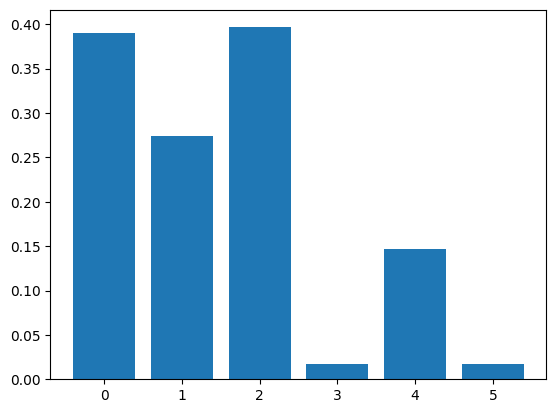

In [33]:
x = range(0,6) # 0, 1, 2, 3, 4, 5
plt.bar(x, df2.mean())
plt.show()

# Text Vectorization & K-Means Clustering

Unlike LDA which uses Probabilities, K-Means uses Distance to classify documents. Therefore, we first need to convert words into numerical coordinates (vectors) based on frequency.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

# Create vectorizer and transform data
vec = CountVectorizer()
X = vec.fit_transform(doc_set)

# Convert to DataFrame for visualization
df3 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df3

,2016,adequately,advanced,analytical,and,application,are,around,assets,associated,...,used,value,variety,velocity,volume,was,well,while,with,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
7,0,0,0,0,1,0,0,0,0,1,...,0,0,1,1,1,1,0,0,1,0
8,1,0,0,1,2,0,0,0,1,0,...,0,1,1,1,1,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- CountVectorizer(): A tool that converts documents into a matrix of token counts.
- X: The Document-Term Matrix (DTM). Rows are documents, columns are words.
- df2: A readable table where the value in cell $(i, j)$ represents how many times word $j$ appears in document $i$.

**LDA Input**: Uses a "Bag of Words" dictionary (ID, Count) for probabilistic inference.

**K-Means Input**: Uses a full numerical matrix to calculate Euclidean Distance between documents in a multi-dimensional space.

### K-Means Clustering

In [35]:
from sklearn.cluster import KMeans

# Train model (k=6)
kmeans = KMeans(n_clusters=6).fit(df3)

# Check results
kmeans.labels_

array([1, 1, 4, 5, 4, 3, 0, 2, 2, 2])

**LDA (Soft Clustering)**: "This document is 80% Topic A and 20% Topic B." (Nuanced).

**K-Means (Hard Clustering)**: "This document belongs to Cluster 3." (Binary/Exclusive).

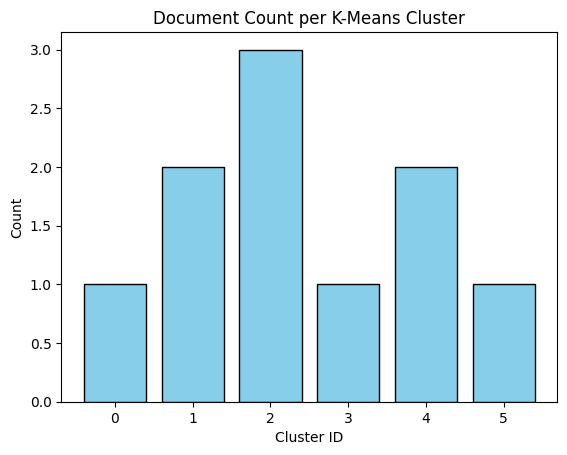

In [36]:
# Plot Counts
counts = pd.Series(kmeans.labels_).value_counts().sort_index()

plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')
plt.title('Document Count per K-Means Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.savefig('kmeans_bar_chart.png')